In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
# 2A
df = pd.read_csv('Ranking.csv')

In [ ]:
predictor = ['Generated', 'Recycling', 'Incineration']
target = ['score']

In [ ]:
# 2B
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Generated     38 non-null     int64  
 1   Recycling     38 non-null     int64  
 2   Incineration  38 non-null     int64  
 3   Score         38 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.3 KB


In [ ]:
# 2C (first rows)
df.head()

,Generated,Recycling,Incineration,Score
0,559,150,152,72.9
1,588,154,226,74.2
2,416,147,179,83.1
3,706,183,34,53.3
4,437,2,1,23.3


In [ ]:
# 2C (last few rows)
df.tail()

,Generated,Recycling,Incineration,Score
33,431,87,259,84.8
34,706,210,333,89.3
35,424,47,0,0.0
36,463,126,190,73.4
37,811,190,95,60.2


#### 2D

Excluding Country, the predictor variables are the Generated, Recycling, and Incineration variables.
The Target variable is the score.

In [ ]:
# 3A
df.describe()

,Generated,Recycling,Incineration,Score
count,38.000000,38.000000,38.000000,38.000000
mean,526.578947,136.394737,128.631579,66.639474
std,154.199701,78.085033,116.258431,22.465632
min,243.000000,2.000000,0.000000,0.000000
25%,425.750000,84.500000,33.250000,55.575000
50%,501.000000,128.000000,90.500000,71.950000
75%,623.500000,181.000000,219.000000,83.400000
max,845.000000,302.000000,382.000000,100.000000


<Figure size 1200x600 with 0 Axes>

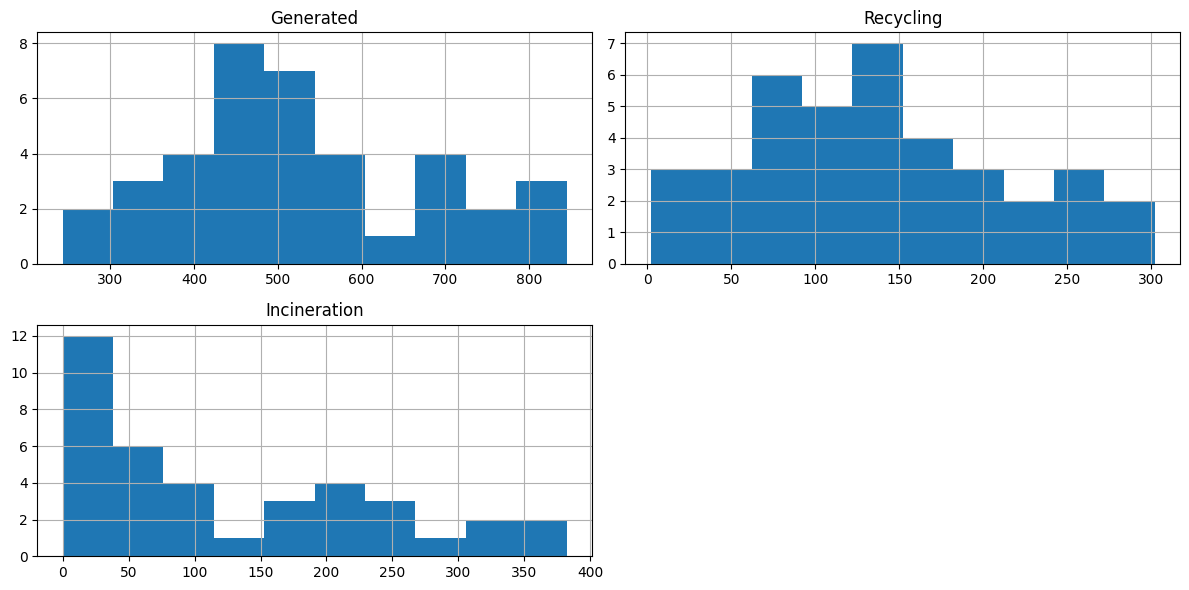

In [ ]:
# 3B
plt.figure(figsize=(12, 6))
df[predictor].hist(bins=10, figsize=(12, 6))
plt.tight_layout()
plt.show()

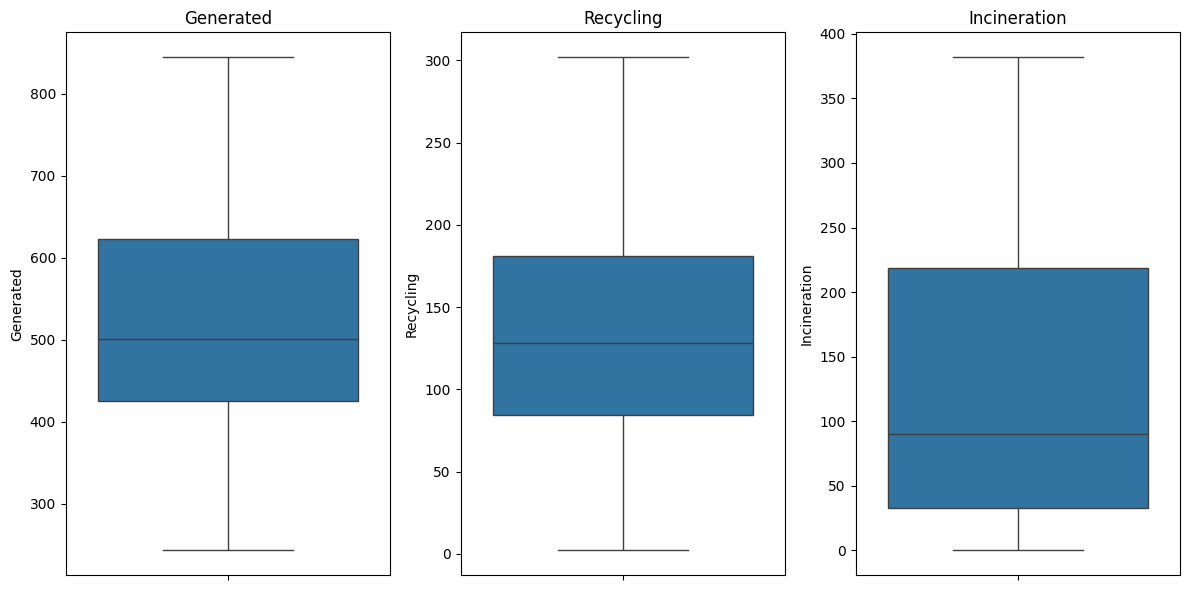

In [ ]:
# 3C
plt.figure(figsize=(12, 6))

i = 1

for column in predictor:
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[column])
    plt.title(column)
    i+=1

plt.tight_layout()
plt.show()

#### 3D

Frequency Plots:
 - Generated Waste: Right-skewed distribution because some countries generate much more waste than others
 - Recycling: The data is spread across all countries with there being a peak in lower values
 - Incineration Rate: Right-skewed distribution aswell with many values being close to zero but very high values in other countries

Box Plots:
 - Generated Waste: Has outliers with extremely high values
 - Recycling: Has outliers that indicate very good recycling programs
 - Incineration Rate: Has some outliers which stray from using incineration, however is popular in other countires

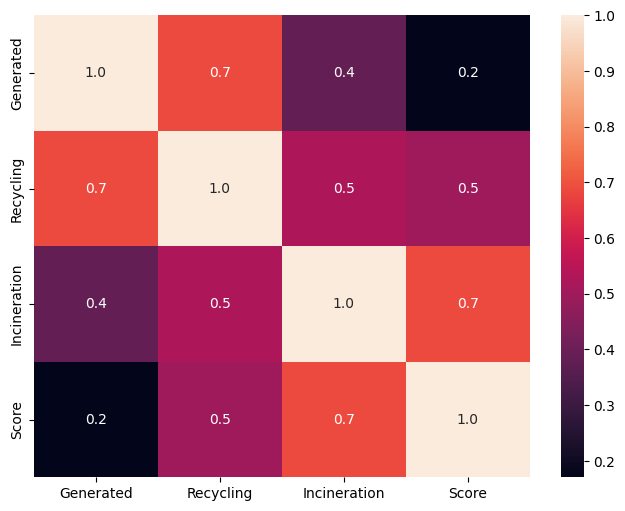

In [ ]:
# 4A

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".1f")
plt.show()

In [ ]:
# 4B (Simple)
X_simple = sm.add_constant(df[['Generated']])
y = df['Score']

# Fit the model
model_simple = sm.OLS(y, X_simple).fit()
print(model_simple.summary())


                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.078
Date:                Fri, 04 Apr 2025   Prob (F-statistic):              0.306
Time:                        11:48:55   Log-Likelihood:                -171.11
No. Observations:                  38   AIC:                             346.2
Df Residuals:                      36   BIC:                             349.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.5592     13.115      4.084      0.0

In [2]:
# 4B (Multi)
X_multi = sm.add_constant(df[predictor])

# Fit the model
model_multi = sm.OLS(y, X_multi).fit()
print(model_multi.summary())

NameError: name 'sm' is not defined

#### 4C

Correlation of Predictors with Score:
- Generated has a weak correlation with Score, therefore waste production alone doesn’t strongly predict waste mismanagement.
- Recycling is negatively correlated with Score, therefore higher recycling rates lead to better waste management.
- Incineration shows some correlation with Score, therefore countries with high incineration may manage waste better.

#### 4D

Ideal Model:
A multiple regression model would be definitely preferred since it uses all of the predictor variables.

Interpretation of the ideal model:<br>
i) P-value: If p-value < 0.05, therefore the null hypothesis shows that it significantly impacts waste mismanagement.<br>
ii) R-squared: Higher R-squared means that the model explains more variance in Score.<br>
iii) F-Statistic: A higher F-statistic indicates the model performs better than other models.